In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


In [111]:
df = pd.read_csv('C:/Users/phuoc/Desktop/Traffic_Prediction_Dataset/data/TrafficTwoMonth.csv')
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


In [113]:
#chọn các cột đặc trưng và nhãn
X = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total',]]
Y = df[['Traffic Situation']]

In [114]:
# Mã hóa cột Traffic Situation
le = LabelEncoder()
Y = le.fit_transform(Y.values.ravel())

#phân chia dữ liệu
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
#kiểm tra kích thước dữ liệu
print(f"Kích thước tập huấn luyện:{X_train.shape}")
print(f"Kích thước tập kiểm tra: {X_test.shape}")

Kích thước tập huấn luyện:(4166, 5)
Kích thước tập kiểm tra: (1786, 5)


In [115]:
#chuẩn hóa dữ liệu 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [116]:
# Khởi tạo Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=75, learning_rate=0.1, max_depth=2, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
gb_model.fit(X_train, Y_train)

# Dự đoán trên tập kiểm tra
Y_pred = gb_model.predict(X_test)

# Tính độ chính xác
train_accuracy = gb_model.score(X_train, Y_train)
test_accuracy = accuracy_score(Y_test, Y_pred)

print(f"Độ chính xác trên tập huấn luyện: {train_accuracy * 100:.2f}%")
print(f"Độ chính xác trên tập kiểm tra: {test_accuracy * 100:.2f}%")

# Báo cáo chi tiết
print("Classification Report:")
print(classification_report(Y_test, Y_pred, target_names=le.classes_))

# Ma trận nhầm lẫn (Confusion Matrix)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))



Độ chính xác trên tập huấn luyện: 99.98%
Độ chính xác trên tập kiểm tra: 99.83%
Classification Report:
              precision    recall  f1-score   support

       heavy       1.00      1.00      1.00       333
        high       0.99      1.00      1.00       122
         low       1.00      0.99      1.00       217
      normal       1.00      1.00      1.00      1114

    accuracy                           1.00      1786
   macro avg       1.00      1.00      1.00      1786
weighted avg       1.00      1.00      1.00      1786

Confusion Matrix:
[[ 333    0    0    0]
 [   0  122    0    0]
 [   0    0  215    2]
 [   0    1    0 1113]]


In [117]:
from sklearn.model_selection import cross_val_score

# Cross-validation (5-fold)
cv_scores = cross_val_score(gb_model, X, Y, cv=5, scoring='accuracy')
print(f"Độ chính xác trung bình qua Cross-Validation: {cv_scores.mean() * 100:.2f}%")
print(f"Độ lệch chuẩn qua Cross-Validation: {cv_scores.std() * 100:.2f}%")


Độ chính xác trung bình qua Cross-Validation: 99.88%
Độ lệch chuẩn qua Cross-Validation: 0.09%


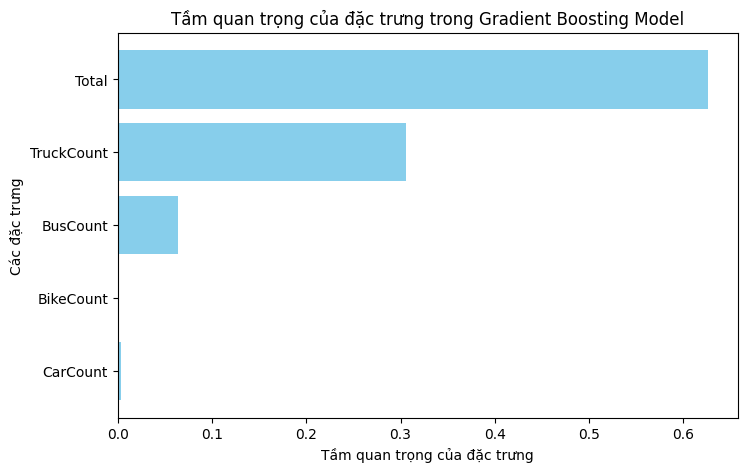

In [118]:
# Lấy tầm quan trọng của các đặc trưng
feature_importance = gb_model.feature_importances_
features = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel('Tầm quan trọng của đặc trưng')
plt.ylabel('Các đặc trưng')
plt.title('Tầm quan trọng của đặc trưng trong Gradient Boosting Model')
plt.show()